In [1]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [2]:
%env GALAXY_API_KEY=88c98d1c08f608ace9cbf5fd766eda96

env: GALAXY_API_KEY=88c98d1c08f608ace9cbf5fd766eda96


# Biolytix Data

## Collection of AMR, VR counts

In [3]:
def get_summary_of_collection(gi, collection_name, history_id, column_name):
    """
    Collects the counts of datasets in a collection
    """

    datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

    #print(datasets)

    #fetch collection by name
    if len(datasets) > 1:
        print("too many datasets with that name")

    for dataset in datasets:
        if dataset['history_content_type']=='dataset_collection': #get only collections
            if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
                dataset_collection_id = dataset["id"]

    look_up = {}
    # get data of the elements in the collection
    collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
    for element in collection['elements']:

        element_name = element['element_identifier']
        element_id = element['object']['id']
        data = gi.datasets.download_dataset(element_id, maxwait = 3)
        df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

        look_up[element_name] = len(df)
        print(element_name, len(df))

    df = pd.DataFrame(look_up.items())
    df.set_index(0, inplace=True)
    df.index.name = "Name"
    df.columns = [column_name]

    return(df)    

## Get df for AMR and VF

In [5]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

collection_name = "VFs of genes Identified by VFDB"
history_id = "a90a5dd2a4c17493"
column_name = "VFs"

VF_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

collection_name = "AMR Identifiied by NCBI"
history_id = "a90a5dd2a4c17493"
column_name = "AMR"

AMR_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

too many datasets with that name
Spike1Barcode10 121
Spike1Barcode11 60
Spike1Barcode12 0
Spike1Barcode13 0
Spike1Barcode14 0
Spike1Barcode15 0
 Spike2Barcode10 135
Spike2Barcode11 97
Spike2Barcode12 77
Spike2Barcode13 0
Spike2Barcode14 0
Spike2Barcode15 0
Spike2bBarcode10 175
Spike2bBarcode11 97
Spike2bBarcode12 84
Spike2bBarcode13 0
Spike2bBarcode14 0
Spike2bBarcode15 0
Spike2bUnclassified 80
Spike3Barcode11 0
Spike3Barcode13 0
Spike3Barcode14 0
Spike3Barcode15 0
Spike3Unclassified 0
Spike3bBarcode10 25
Spike3bBarcode12 70
Spike3bBarcode11 79
Spike3bBarcode13 0
Spike3bBarcode14 0
Spike3bUnclassified 0
Spike3bBarcode15 0
Spike4Barcode01 69
Spike4Barcode02 0
Spike4Barcode03 0
Spike4Barcode04 0
Spike4Barcode05 0
Spike4Barcode07 0
Spike4Barcode08 0
Spike4Barcode10 0
Spike4Barcode11 0
Spike4Barcode12 0
Spike4Barcode13 0
Spike4Barcode14 0
Spike4Barcode15 0
Spike4Barcode16 0
Spike4Unclassified 0
too many datasets with that name
Spike1Barcode10 5
Spike1Barcode11 0
Spike1Barcode12 0
Spike1Bar

In [7]:
frames = [VF_df, AMR_df]
merged_df = pd.concat(frames, axis = 1)

#from IPython.core.display import HTML
print(merged_df.to_string())



                     VFs  AMR
Name                         
Spike1Barcode10      121    5
Spike1Barcode11       60    0
Spike1Barcode12        0    0
Spike1Barcode13        0    0
Spike1Barcode14        0    0
Spike1Barcode15        0    0
 Spike2Barcode10     135    6
Spike2Barcode11       97    0
Spike2Barcode12       77    0
Spike2Barcode13        0    0
Spike2Barcode14        0    0
Spike2Barcode15        0    0
Spike2bBarcode10     175    4
Spike2bBarcode11      97    0
Spike2bBarcode12      84    0
Spike2bBarcode13       0    0
Spike2bBarcode14       0    0
Spike2bBarcode15       0    0
Spike2bUnclassified   80    5
Spike3Barcode11        0    0
Spike3Barcode13        0    0
Spike3Barcode14        0    0
Spike3Barcode15        0    0
Spike3Unclassified     0    0
Spike3bBarcode10      25    0
Spike3bBarcode12      70    0
Spike3bBarcode11      79    0
Spike3bBarcode13       0    0
Spike3bBarcode14       0    0
Spike3bUnclassified    0    0
Spike3bBarcode15       0    0
Spike4Barc

## Map with metadata

In [8]:
meta_df = pd.read_excel(open('data/FoodbornePathogenDetectionDataAnalysis.xlsx', 'rb'), sheet_name='Biolytix Spiked') 
meta_df.set_index("Galaxy ID", inplace=True)
meta_df.index.name = "Name"
frames = [merged_df, meta_df]
result = pd.concat(frames, axis = 1)
# print(len(result.columns))
# print(len(meta_df.columns))

print(result.to_string())

                       VFs  AMR Sample Barcode Number DSM-Number  bx-number  Lot-Number Data Sequencing Source Sequencing Date                                                                              Information                                 Expected Strain Deplition  CT Value Enterica  CT Value Houtenae  CT Value Salamae         CT  CFU Enterica  CFU Houtenae  CFU Salamae           CFU Enrichment   Medium  Galaxy Analysis Date  History Link                                                                                                                                                                                                                                                                                                                                                                                                           Comments
Name                                                                                                                                             

## plot it 

### Bar plot (Paul's example)

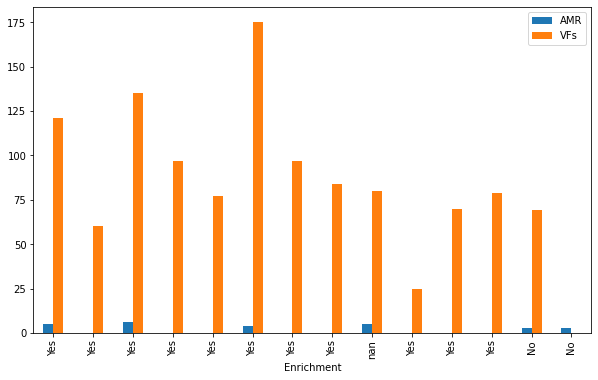

In [16]:
import matplotlib.pyplot as plt
import numpy as np

selection = result[(result["AMR"] != 0) | (result["VFs"] != 0)]
selection = selection.dropna(subset = ["AMR","VFs"])

#print(selection["Enrichment"])
#print(selection.columns)
selection.set_index(["Enrichment"], drop=True, inplace = True)
#print(selection)
selection.plot( kind = "bar",
                #x = ["Enrichment"],
                y = ["AMR","VFs"], 
                figsize=(10,6), 
                )
plt.show()

### Violin Plot

#### for VFs

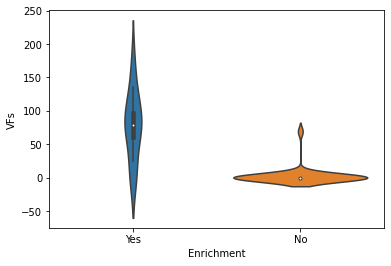

In [10]:
import numpy as np
import seaborn as sns


sns.violinplot(data=result, x="Enrichment", y="VFs")
plt.show()

#### for AMR

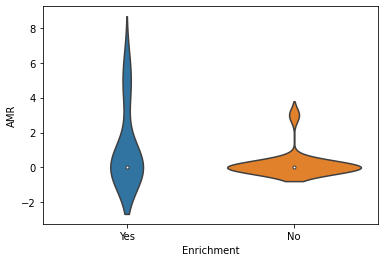

In [11]:
sns.violinplot(data=result, x="Enrichment", y="AMR")
plt.show()

### Scatter Plot

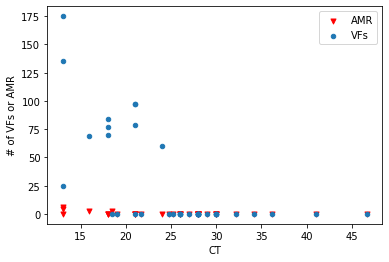

In [13]:
selection = selection.dropna(subset = ["AMR","VFs"])
selection.set_index(["Enrichment"], drop=True, inplace = True)

ax = selection.plot(kind='scatter', x='CT', y='AMR', color='r', marker='v', s=25, label="AMR")    
selection.plot.scatter(
                x = 'CT',
                y = 'VFs',
                ax=ax, label="VFs")
ax.set_ylabel("# of VFs or AMR")
ax.set_xlabel("CT")
plt.show()

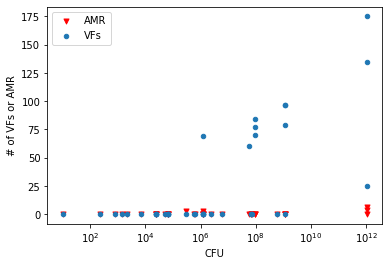

In [18]:
ax = selection.plot(kind='scatter', x='CFU', y='AMR', color='r', marker='v', s=25, label="AMR")    
selection.plot.scatter(
                x = 'CFU',
                y = 'VFs',
                ax=ax, label="VFs")
ax.set_ylabel("# of VFs or AMR")
ax.set_xlabel("CFU")
ax.set_xscale('log')
plt.show()

### Taxonomy Profiling Heatmap -- in biolytix_taxonomy_heatmap_from_collection.ipynb